Machine Learning

Supervised Machine Learning Algorithms

Unsupervised Machine Learning Algorithms

Dependent Variable/ Target Variable
Independent Variables/Predictor Variables

Predictive Models : --> learning from the statistical/mathematical relationship between a Dependent variable and
one or more independent variables from the historic data

Regression : Target variable --> Continuous random variable
Classification : Target variable --> Categorical/pre-defined/classes

Retail -->Product price prediction, customer behaviour analysis/purchase pattern,product clustering, product recommendation,
customer review analysis

Banking --> Fraud analysis, Risk analysis, Target an ad for a deposit scheme

Insurance --> Risk analysis

Oil & Gas --> Threat Analysis

Etailing, FMCG, Tourism, Travel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
l = load_boston()

In [ ]:
df = pd.DataFrame(l.data, columns= l.feature_names)

In [ ]:
df['PRICE'] = l.target

In [ ]:
df.head()

In [ ]:
print(l.DESCR)

Linear Models --> Define a simple relationship between the "Y" & all the "X" variables

Non-linear Models --> Learn from the non-linear relationship between the "Y" and all the "X" variables

Ensemble Algorithms --> Group of models

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df['CHAS']=df['CHAS'].astype(int)

In [ ]:
df.describe().T

In [ ]:
# Uni-variate Analysis & multi-variate Analysis

In [ ]:
# Distribution of the Target Variable

In [ ]:
sns.distplot(df['PRICE'])

In [ ]:
sns.boxplot(y=df['PRICE'])

In [ ]:
plt.scatter(df['CRIM'],df['PRICE'])

In [ ]:
df['CRIM'].corr(df['PRICE'])

In [ ]:
plt.scatter(df["RM"],df['PRICE'])

In [ ]:
sns.countplot(df["CHAS"])

In [ ]:
plt.plot(df['AGE'])

# Linear Regression

Simple : Only one independent variable

Multiple : More than one independent variable

e(y) = b0 + b1*x1 + b2*x2 + b3*x3 + ......... + bn*xn

e(price) = b0 + b1*(CRIM) + b2*(RM) + b3* (LSTAT) +......... bn*xn

Ordinary Least squared --> Line of best fit --> Least squared distance between the "Actual values" and "Fitted values"

Residuals / Error --> Squared distance between the fitted values and actual values

Slope coefficient/ Weight --> Impact on y upon the variation in x [b1= sum(xi-mean(x)(yi-mean(y)/sum(xi-mean(x)2]

Intercept --> Y value when the x value is zero [b0 = mean(y)-b1*mean(x)

In [ ]:
# Assumption 1 : Ensure the "X" variables to have a "linear relationship" with the "Y" variable

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
plt.figure(figsize = (10,10))
sns.pairplot(df)

In [ ]:
sns.lmplot('CRIM','PRICE', data=df)

In [ ]:
sns.lmplot('RM','PRICE', data=df)

In [ ]:
x = df.iloc[:,:13]

In [ ]:
y = df['PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [ ]:
x_test.shape

In [ ]:
x_train

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
sns.boxplot(y=df['PRICE'])

In [ ]:
sns.boxplot(y=y_train)

In [ ]:
sns.boxplot(y=y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
model1 = lr.fit(x_train,y_train)

In [ ]:
for i in model1.coef_:
    print(round(i,2))

In [ ]:
e(price) = 37 + (-0.11)*(5.82) + 3.63*(6.51) + (-0.56)*(10.29) +......... bn*xn

In [ ]:
y_test.iloc[0]

In [ ]:
x_test.iloc[0,:]

In [ ]:
model1.coef_.round(2)

In [ ]:
x.columns

In [ ]:
model1.intercept_

In [ ]:
pred_price = model1.predict(x_test)

In [ ]:
pred_price[:5]

In [ ]:
y_test[:5]

In [ ]:
import statsmodels.api as sm

In [ ]:
model_stats = sm.OLS(y_train,x_train)
m = model_stats.fit()

In [ ]:
m.summary()

In [ ]:
# Forward propagation : Add one variable at a time, look at the "P-Value" and decide whether it's useful to the model
# Backward propagation : Add all the variables and start removing variables which has more than 0.05 (p-value)
# Stepwise : Akanine Information Criteria  (AIC)

In [ ]:
m2 = sm.OLS(y_train,x_train.drop(['INDUS','NOX','AGE'], axis=1))

In [ ]:
m2 = m2.fit()

In [ ]:
m2.summary()

In [ ]:
m2.resid[:10]

In [ ]:
m2.fittedvalues[:10]

In [ ]:
y_train[:10]

In [ ]:
# Assumption 2 : The Errors/Residuals need to be normally distributed / shouldn't carry a pattern

In [ ]:
# Assumption 3 : Avoid High-multi collinearity : X variable having high correlation with another X variable
# (if [VIF>10] consider that as high multi-collinearity)

In [ ]:
sns.distplot(m2.resid)

In [ ]:
pred_res = m2.predict(x_test.drop(['AGE','INDUS','NOX'],axis=1))

In [ ]:
pred_res[:10]

In [ ]:
y_test[:10]

In [ ]:
df_residuals = pd.DataFrame({'Actual':y_test, 'Predicted':pred_res})

In [ ]:
df_error = df_residuals.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(15,15))
df_error.plot()

In [ ]:
sns.boxplot(y=y_test)

In [ ]:
df_residuals

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse_m2 = mean_squared_error(y_test,pred_res)

In [ ]:
mse_m2

In [ ]:
mean_absolute_error(y_test,pred_res)

In [ ]:
rmse = np.sqrt(mse_m2)

In [ ]:
rmse

In [ ]:
# R squared  --> Co-efficient of Determination --> Proportion of ssreg in sst
# Adjusted R Squared --> Penalising the r2 each time an independent variable is added

# SSerror --> Error/residual between fitted and actual values (Unexplained error)

# SSreg --> squared error between the fitted and mean value of y due to regression line (Explained error)

# SStotal --> Squared error between actual and the mean value.

In [ ]:
# Handling Outliers

# Get rid of the outlier values
# Change the values
# Feed the model with additional information to learn about the extreme values

In [ ]:
sns.boxplot(y=df['PRICE'])

In [ ]:
df1 = pd.read_csv("D:/data/Regression.csv")

In [ ]:
df1.head()

In [ ]:
sns.boxplot(y=df1['Purchase made'])

In [ ]:
df1.corr()

In [ ]:
df1.shape

In [ ]:
gp = df1.groupby('Job Type')

In [ ]:
gp['Purchase made'].mean()

In [ ]:
x = df1.iloc[:,:6]

In [ ]:
y = df1['Purchase made']

In [ ]:
ln = lr.fit(x,y)

In [ ]:
x.columns

In [ ]:
# Using categorical independent variables [dummy variables (n-1)]

In [ ]:
dummy_vars = pd.get_dummies(df1[['Job Type','Marital Status', 'Education', 'Metro City']], drop_first=True)

In [ ]:
dummy_vars

In [ ]:
df1.drop(['Job Type','Marital Status', 'Education', 'Metro City'], axis=1, inplace=True)

In [ ]:
df2 = pd.concat([df1,dummy_vars],axis=1)

In [ ]:
df2.shape

In [ ]:
x = df2.iloc[:,:10]

In [ ]:
x.drop(['Purchase made'], axis=1, inplace=True)

In [ ]:
y = df2['Purchase made']

In [ ]:
df2.dropna(inplace=True)

In [ ]:
lr.fit(x,y)

In [ ]:
# Non-linear Regression

Polynomial Linear Regression
Squared
Square root
power
Recursive
logarithm
Recursive
Decision Tree
SVM
KNN

e(y) = b0+b1*(x1)2+b2*np.sqrt(x2)+b3*np.exp(x3)

In [ ]:
x_train

In [ ]:
# CART --> Decision Trees --> MSE (Splitting criteria)
# Condition based model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=3)

In [ ]:
d1 = dt.fit(x_train,y_train)

In [ ]:
#!pip install dtreeviz

In [ ]:
#!pip install graphviz

In [ ]:
from dtreeviz.trees import dtreeviz

In [ ]:
tree_viz1 = dtreeviz(d1, x_train, y_train, target_name='PRICE', feature_names=x_train.columns)

In [ ]:
tree_viz1

In [ ]:
pred_price = d1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_price))

In [ ]:
# Advantages : Easy to understand and explain, Comprehensive, Unaffected by outliers, 
# Disadvantage : Generalised output(Avg of y for a range of x values)

In [ ]:
# Ensemble : Group 

# Bagging : Random Forest
# Boosting : Gradient Boosting, ADA Boosting, XGBoosting, Cubist, catboost

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
model_rf = rf.fit(x_train,y_train)

In [ ]:
pred_rf = model_rf.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_rf))

In [ ]:
from sklearn.svm import SVR

In [ ]:
s =  SVR(kernel="linear")

In [ ]:
m1 = s.fit(x_train,y_train)

In [ ]:
pred_svr  = m1.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_svr))

In [ ]:
# Classification

In [ ]:
df = pd.read_csv("D:/data/churn.csv")

In [ ]:
df.head()

In [ ]:
df['Exited'].value_counts()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.describe().T

In [ ]:
df.CreditScore.max()

In [ ]:
df.CreditScore.min()

In [ ]:
df.Geography.nunique()

In [ ]:
df.Geography.value_counts()

In [ ]:
pd.crosstab(df['Geography'],df['Exited'])

In [ ]:
gp_sal = df.groupby('Geography')

In [ ]:
gp_sal.mean()

In [ ]:
sns.boxplot(df['Exited'],df['CreditScore'])

In [ ]:
sns.countplot(df['Exited'],hue=df['Gender'])

In [ ]:
pd.crosstab(df['Gender'],df['Exited'])

In [ ]:
df['Gender'].value_counts()

In [ ]:
1139/4543

In [ ]:
898/5457

In [ ]:
# Check for class distribution
sns.countplot(df['Exited'])

In [ ]:
df.Exited.value_counts()

In [ ]:
# Baseline accuracy

In [ ]:
7963/10000

In [ ]:
2037/10000

# Logistic Regression  --> Probabilistic Model

g(e(y)) --> b0+b1*x1+b2*x2+.......bn*xn

 Binary Classifier

 g() --> Link function

 GLM doesn't assume a linear relationship b/w the y and all the x vars, 
(assumes a linear relationship b/w link fn and the x vars in the "Logit" model)

 Target variable Y need not be normally distributed
 
 GLM uses Maximum Likelyhood instead of OLS
 
 Errors need not be normally distribued however needs to be independent

p = 1/2 = 0.5

odds = 0.5/0.5 = 1:1

odds ratio = p/1-p

p(heads) --> 7/10 = 0.7

odds(heads) --> 0.7/0.3 = 2.33

p = 0 & 1

p < 1

p > 0

p = exp(b0+b1x1) --> For any values of x and its slope y would bever be negative

p = exp(bo+b1x1)/exp(b0+b1x1)+1 ---> Y would always be less than 1

p = e^y/e^y+1

q = 1-(e^y/e^y+1)

p/1-p = ey

log[p/1-p] = y

log[p/1-p] --> Link function 

log[p/1-p] = b0+b1*x1

sigmoid function (Squashing function) --> Inverse Logit Function

s(y) = 1/1+e(-y)

In [ ]:
df.head()

In [ ]:
x = df.iloc[:,2:12]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
dummy_vars = pd.get_dummies(df[['Gender','Geography']],drop_first=True)

In [ ]:
dummy_vars

In [ ]:
x.drop(df[['Gender','Geography']], axis=1, inplace=True)

In [ ]:
x= pd.concat([x,dummy_vars], axis=1)

In [ ]:
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=4)

In [ ]:
help(train_test_split)

In [ ]:
x_train

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
# Distrubution of y in original data is maintained in training & testing samples
y_train.value_counts()

In [ ]:
6359/8000

In [ ]:
y_test.value_counts()

In [ ]:
1587/2000

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
help(lr.fit)

In [ ]:
# Before using the model for prediction, make sure the model is a valid model using ROCR/AUC

In [ ]:
# ROCR --> Receiver Operating Characteristic Plot
# AUC --> Area under curve

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model.predict_proba(x_test)[:,1]

In [ ]:
model.coef_

In [ ]:
pred_res = model.predict(x_test)

In [ ]:
pred_res[:20]

In [ ]:
y_test[:20]

In [ ]:
pd.crosstab(y_test,pred_res)

In [ ]:
help(metrics.roc_curve)

In [ ]:
y_pred = model.predict_proba(x_test)[:,1]
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="Curve, Auc = "+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
pred_res = model.predict_proba(x_test)

In [ ]:
pred_res[:,1]

In [ ]:
pd.crosstab(y_test,pred_res[:,1]>0.5)

In [ ]:
x_train

In [ ]:
pred_res[:10]

In [ ]:
y_test[:10]

In [ ]:
# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

In [ ]:
confusion_matrix(y_test,pred_res)

In [ ]:
                   Predicted
                   0       1
    
           0      TN       FP 
Actual
           1      FN       TP



In [ ]:
(1572+26)/2000

In [ ]:
(1550+27)/(1550+37+27+386)

In [ ]:
# Recall
26/(26+370)

In [ ]:
# Precision
26/(26+32)

In [ ]:
print(classification_report(y_test,pred_res))

In [ ]:
accuracy_score(y_test,pred_res)

In [ ]:
import statsmodels.api as sm

In [ ]:
m = sm.GLM(y_train,x_train,family=sm.families.Binomial())

In [ ]:
# sm.Logit()

In [ ]:
m1 = m.fit()

In [ ]:
m1.summary()

In [ ]:
m1.fittedvalues[:10]

In [ ]:
y_train[:10]

In [ ]:
pred_res1 = m1.predict(x_test)

In [ ]:
pred_res1[:40]   

In [ ]:
pd.crosstab(y_test,pred_res1>0.5)

In [ ]:
confusion_matrix(y_test,pred_res1>0.5)

In [ ]:
(1556+93)/2000

In [ ]:
93/(93+48)

In [ ]:
pred_res1

In [ ]:
m1.summary2()

In [ ]:
y_test[:5]

In [ ]:
pred_res1[:5]

In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
d1 = DecisionTreeClassifier()

In [ ]:
d2 = d1.fit(x_train,y_train)

In [ ]:
pred_train = d2.predict(x_train)

In [ ]:
pred_unpruned = d2.predict(x_test)

In [ ]:
pd.crosstab(y_test,pred_unpruned)

In [ ]:
pd.crosstab(y_train,pred_train)

In [ ]:
(1364+223)/2000

In [ ]:
223/(223+240)

In [ ]:
dtree = DecisionTreeClassifier(max_leaf_nodes=10,max_depth=6,min_samples_leaf=1)

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
model_tree = dtree.fit(x_train,y_train)

In [ ]:
from dtreeplt import dtreeplt

In [ ]:
dtree_reg = dtreeplt(
model = model_tree,
feature_names=x_train.columns,
target_names= np.array(["neg","pos"]))

In [ ]:
y_train.value_counts()

In [ ]:
dtree_reg.view()

In [ ]:
# Impurity Measures

# Gini Index  --> p2+q2
# Entropy & Information Gain   --> sum(p*log(p)2) + (1-p*log(1-p)2) --> 1-entropy
# Chi-square --> (o-e)2/o

In [ ]:
viz = dtreeviz(model_tree, x_data=x_train, y_data=y_train, 
               target_name='Exited', feature_names=x_train.columns, class_names=['pos','neg'])

In [ ]:
# Pruning
# Random forest
# Boosting

# Data Preparation
# Evaluation of the models --> Hyper parameter tuning techniques

In [ ]:
pred_tree = model_tree.predict(x_test)

In [ ]:
pd.crosstab(y_test,pred_tree)

In [ ]:
186/(186+70)

In [ ]:
(1534+186)/2000

In [ ]:
# Decision Tree Pruning

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [ ]:
from sklearn import tree

In [ ]:
params = {'max_depth' : [2,4,6,8,10],
         'max_leaf_nodes' : [5,10],
         'min_samples_leaf' : [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train,y_train)

In [ ]:
model_tree.get_params().keys()

In [ ]:
gcv.best_estimator_

In [ ]:
new_model = gcv.best_estimator_
new_model.fit(x_train,y_train)
y_train_pred = new_model.predict(x_train)
y_test_pred = new_model.predict(x_test)

In [ ]:
print(f'Train Score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

In [ ]:
path = dtree.cost_complexity_pruning_path(x_train,y_train)

In [ ]:
path['ccp_alphas']

In [ ]:
alpha = path['ccp_alphas']

In [ ]:
alpha

In [ ]:
acc_train, acc_test = [],[]

for i in alpha:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(x_train,y_train)
    y_train.pred = tree.predict(x_train)
    y_test.pred = tree.predict(x_test)
    
    
    acc_train.append(accuracy_score(y_train,y_train.pred))
    acc_test.append(accuracy_score(y_test,y_test.pred))
    acc_train.append(precision_score(y_train,y_train.pred))
    acc_test.append(precision_score(y_test,y_test.pred))

In [ ]:
acc_train

In [ ]:
acc_test

In [ ]:
sns.set()

plt.figure(figsize=(15,10))
sns.lineplot(y=acc_train, x=alpha, labels = "Training_acc")
sns.lineplot(y=acc_test, x=alpha, labels = "Testing_acc")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [ ]:
alpha

In [ ]:
new_model = DecisionTreeClassifier(ccp_alpha=0.004466)

In [ ]:
newmodel = new_model.fit(x_train,y_train)

In [ ]:
pred_res_alpha = newmodel.predict(x_test)

In [ ]:
pd.crosstab(y_test,pred_res_alpha)

In [ ]:
186/(186+70)

In [ ]:
(1534+186)/2000

In [ ]:
1534/(1534+210)

In [ ]:
confusion_matrix()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_model = rf.fit(x_train,y_train)

In [ ]:
rf_model.feature_importances_

In [ ]:
x_train.columns

In [ ]:
pred_rf = rf_model.predict(x_test)

In [ ]:
pd.crosstab(y_test,pred_rf)

In [ ]:
(194)/(194+60)

In [ ]:
(1544+194)/2000

In [ ]:
# Data Preparation / Hyper parameter tuning / Model Evaluation

In [ ]:
# Data Pre-processing --> Data Transformation [Standardisation, Normalisation]

# Sampling --> Train/Test, Cross Validation [KFold CV, Repeated K-fold CV, Stratified CV]

# Feature Selection --> P-Value,Step function, Lasso, AUC(ROC), K-Best,Chi-square,RFE

# Feature Extraction --> PCA, LDA

# Handling Class Imbalances --> Undersampling, Oversampling, SMOTE

In [ ]:
df[df['Exited']==1]

In [ ]:
# Kfold CV --> 3 folds (n_splits = 3)
# 10,000 Records

In [ ]:
# 1st chunk --> 3500

# 2nd chunk --> 3500

# 3rd chunk --> 3000

In [ ]:
# 1st model --> use 1st and 2nd chunk for training and test on 3rd chunk --> accuracy (80%)

# 2nd model --> use 1st and 3rd chunk for training and test on 2nd chunk --> accuracy (70%)

# 3rd model --> use 3rd and 2nd chunk for training and test on 1st chunk --> accuracy (75%)

In [ ]:
# return the avg(3 models accuracy as the avg accuracy of a algorithm on the given dataset)

In [ ]:
# Feature Selection Techniques

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, RFE

In [ ]:
import warnings
warnings.ignore = True

In [ ]:
lr = LogisticRegression()

In [ ]:
rfe_lr = RFE(lr, 5)
result = rfe_lr.fit(x_train,y_train)

In [ ]:
result.n_features_

In [ ]:
result.ranking_

In [ ]:
x_train.columns

In [ ]:
# Chi2 with Kbest

In [ ]:
model = SelectKBest(score_func=chi2,k=5)
result_kbest = model.fit(x,y)

In [ ]:
result_kbest.scores_

In [ ]:
for i in result_kbest.scores_:
    print(round(i,2))

In [ ]:
x_train.columns

In [ ]:
result_kbest.get_support()

In [ ]:
columns = result_kbest.transform(x)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
model.fit(x,y)

In [ ]:
model.feature_importances_

In [ ]:
# Evaluation of Algorithms

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [150]:
models = []

In [151]:
models.append(("LR", LogisticRegression()))
models.append(("Tree", DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10)))
models.append(("SVM", SVC()))
models.append(("RF", RandomForestClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("NB", GaussianNB()))
models.append(("XGB", XGBClassifier()))

In [ ]:
models

In [152]:
results = []
names = []

In [ ]:
from sklearn.model_selection import KFold , cross_val_score, GridSearchCV

In [155]:
for name,model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model,x,y,cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    
    outcome = "%s: %f (%f)" % (name,cv_results.mean()*100, cv_results.std()*100)
    print(outcome)

LR: 79.010000 (0.489285)
Tree: 85.370000 (0.620967)
SVM: 79.630000 (0.705408)
RF: 86.380000 (0.434281)
KNN: 76.410000 (0.404228)
LDA: 80.700000 (0.732803)
NB: 78.430000 (0.640781)
XGB: 86.370000 (0.587026)


In [156]:
results

[array([0.42857143, 0.44262295, 0.39655172, 0.35849057, 0.34848485]),
 array([0.74789916, 0.77419355, 0.71755725, 0.7480315 , 0.66806723]),
 array([0., 0., 0., 0., 0.]),
 array([0.80508475, 0.82945736, 0.75285171, 0.76470588, 0.72033898]),
 array([0.29104478, 0.28571429, 0.26865672, 0.22727273, 0.23776224]),
 array([0.56338028, 0.59146341, 0.54658385, 0.60893855, 0.51336898]),
 array([0.36986301, 0.36842105, 0.37647059, 0.35443038, 0.32978723]),
 array([0.80952381, 0.81327801, 0.73809524, 0.78030303, 0.75688073]),
 array([0.788 , 0.7815, 0.7925, 0.7935, 0.795 ]),
 array([0.851 , 0.853 , 0.8555, 0.864 , 0.845 ]),
 array([0.792 , 0.785 , 0.7985, 0.801 , 0.805 ]),
 array([0.857 , 0.867 , 0.8615, 0.8695, 0.864 ]),
 array([0.764 , 0.7565, 0.7675, 0.765 , 0.7675]),
 array([0.801 , 0.8   , 0.806 , 0.8205, 0.8075]),
 array([0.7825, 0.7725, 0.788 , 0.7895, 0.789 ]),
 array([0.8635, 0.8605, 0.8585, 0.875 , 0.861 ])]

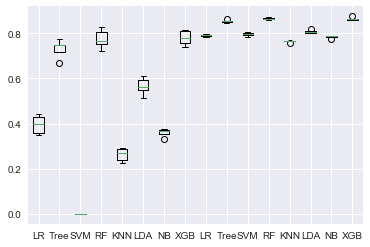

In [157]:
fig = plt.figure()
axis = fig.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

In [158]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data
#dataframe = pd.read_csv("D:/data/diabetes.csv")
#array = dataframe.values
#X = array[:,1:9]
#Y = array[:,9]
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('Tree', DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10)))
model = Pipeline(estimators)
# evaluate pipeline
#seed = 7
kfold = KFold(n_splits=5)
results = cross_val_score(model, x_train,y_train, cv=kfold,scoring='precision')
print(results.mean())

0.7403588786096884


In [ ]:
# Handling Class imbalance

# Under Sampling

# Over Sampling

# SMOTE --> Synthetic Minority Over Sampling

In [ ]:
df['Exited'].value_counts()

In [ ]:
df[df['Exited']==1][:10]

In [ ]:
import six

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#!pip install six

In [ ]:
#!pip install django-utils-six

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [ ]:
from sklearn.neighbors.base import KNeighborsMixin

In [ ]:
#!pip install --user scikit-learn==0.22.1